# **The Sparks Foundation**
Data Science & Business analytics

**By - Nandita Baniya**

**Task 1 :** Predict the percentage of an student based on the no. of study hours.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data loaded")
df.head(10)
df.shape

Data loaded


(25, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualizing the relation between the dependent variable and independent variable

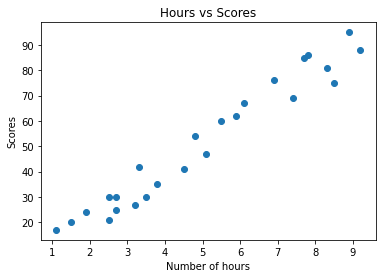

In [5]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.xlabel("Number of hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show() 

Data is splitted in two parts : Training and Testing

In [6]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['Hours'].values.reshape(-1,1),df['Scores'],test_size=0.3,random_state=200)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((17, 1), (17,), (8, 1), (8,))

Training the data

In [7]:
from sklearn.linear_model import LinearRegression
#create linear regression object
reg = LinearRegression()
# train the model using the training sets
reg.fit(X_train,Y_train)
print("Training complete!!")

Training complete!!


Plotting the regression line

In [8]:
# Building the line
slope = reg.coef_
intercept = reg.intercept_
line = slope*df['Hours'].values + intercept

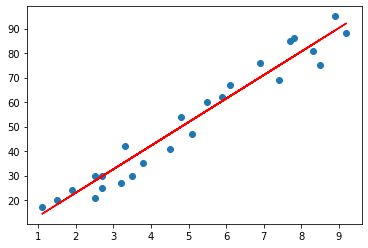

In [9]:
#Plot line
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'], line,color='red')
plt.show()

Predict values

In [10]:
pred = reg.predict(X_test)
pred

array([74.8476989 , 40.29506065, 34.53628761, 22.05894602, 70.04872137,
       62.37035731, 27.81771906, 18.219764  ])

Compare actual and predicted values

In [11]:
pred_compare= pd.DataFrame({'Actual_values': Y_test, 'Predicted_values': pred})
pred_compare   

,Actual_values,Predicted_values
19,69,74.847699
22,35,40.295061
2,27,34.536288
17,24,22.058946
23,76,70.048721
18,67,62.370357
0,21,27.817719
5,20,18.219764


Evaluating Model

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, pred)**0.5)
print('R2 Score:', metrics.r2_score(Y_test, pred))

Mean Absolute Error: 4.9748721918004435
Mean Squared Error: 28.662301693315563
Root Mean Squared Error: 5.353718492161832
R2 Score: 0.9431285906565743


Prediction of the score for the student who studies for 9.25 Hours/day.

In [13]:
hours = [[9.25]]
own_pred = reg.predict(hours)
print("Number of hours={}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

Number of hours=[[9.25]]
Predicted score = 92.60391577880367


RESULT: 92.60391577880367 will be predicted score if a student study for 9.25 hrs in a day.